## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
#Dan Kagan | Online Self-Paced | PROJECT TIME | 
#Instructor: Jeff Herman | https://medium.com/@dankagan7/data-science-and-me-1d3e8a7d8bf2

#Module 1 Project Assignment:
# Your team is charged with doing data analysis and creating a presentation 
#...that explores what type of films are currently doing the best at the box office. 
#...You must then translate those findings into actionable insights that the CEO 
#...can use when deciding what type of films they should be creating.


###Potential Questions for Research
# What genre are the top 25 grossing movies? Domestic? Foreign? Both?
# What kind of dropoffs are there by gross rank - who stands out?
# Most successful studios? What kind of movies do they make? Are they good to imitate?
# Identify the most successul directors & actors (matches on titles) Strategy based off results?
# Check success of movies that receives good ratings - how much does it help with success?
# Sort by top ratings by reviewers. Any patterns?
# Movies table -> Revisit table
# Patterns in movie_budgets?


#--------------------------------------Visualizations-Below----------------------------------------------#
#--------------------------------------------------------------------------------------------------------#

In [4]:
#Visualization 1 - TMDB "tmdb.movies.csv"
#Question: What are the most popular movie genres on TMDB?

#Imports
#Importing numpy for analytical calculations & pandas for handling data as a DataFrame object
import numpy as np
import pandas as pd

#Convert CSV file to DataFrame object and orient myself with the data
df = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tmdb.movies.csv')
#df.info()

#Clean up DataFrame column names
df = df.rename(columns={
    'Unnamed: 0' : 'Film ID',
    'genre_ids' : 'Genre IDs',
    'original_language' : 'Original Language',
    'original_title' : 'Original Title',
    'popularity' : 'Popularity Rating',
    'release_date' : 'Release Date',
    'title' : 'Film Title',
    'vote_average' : 'Average Vote Score',
    'vote_count' : 'Total Votes'
})

#Remove columns with irrelevant data
df = df.set_index('Film ID')
df = df.drop('id', axis=1)
df = df.drop('Original Language', axis=1)
df = df.drop('Genre IDs', axis=1)
df = df.drop(23819) #Specifically drops a duplicate record of Ragnarok from Top 25 (row)
df = df.drop(20617) #Specifically drops a duplicate record of Blade Runner 2049 from Top 25 (row)

#Turn Release Date column data from strings to Date objects
pd.to_datetime(df['Release Date'])

#Sort entire dataset by 'Popularity Rating', formerly 'popularity'
df_tmdb_popularity_viz = df.sort_values(by='Popularity Rating', ascending=False)
#Show Top 25 most popular films
df_tmdb_popularity_viz.head(25)



,Original Title,Popularity Rating,Release Date,Film Title,Average Vote Score,Total Votes
Film ID,,,,,,
23811,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23813,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [5]:
#Data Analysis of Top 25 TMDB most Popular films

#Average Popularity Rating among the Top 25 most popular TMDB films
df_tmdb_popularity_viz['Popularity Rating'].head(25).mean()

47.94191999999999

In [6]:
#Average Vote Score among the Top 25 most popular TMDB films
df_tmdb_popularity_viz['Average Vote Score'].head(25).mean()

7.244

In [7]:
#As we can see from the list of TMDB's 25 Most Popular films, it is apparent that the most popular
#genres of films are Super Hero movies, Well-Known Series (non-Super Hero like LOTR, Star Wars, etc.), and Children's movies.

#15 of the top 25 are Super Heroe movies (60%)
#4 of the top 25 are Well-Known Series (16%)
#3 of the top 25 are Childerns movies (12%)
#3 of the top 25 are One-off successful films (12%)

#The fact that Super Hero & Well-Known Series films makeup over 3/4 of TMDB's top 25 most popular movies
#is an incredibly compelling statistic if Microsoft decides to create new content.
#Unfortunately, Microsoft is late to this strategy and would thus have to be creative about how they
#could participate in creating these movies when Marvel Comic Universe, Sony, Universal and Disney all own the 
#vast majority of intellectual property rights for these film series. Otherwise they will be spending a lot of money
#on the ability to try and make a decent film from one (or many) super hero or well-known characters.

#------------------------------------End-of-Example-1------------------------------------------#
#----------------------------------------------------------------------------------------------#


In [40]:
#Visualization 2 - The Movie Data Base "tmdb.movies.csv"
#Question: What are the most lucrative types of films?

#imports
#importing matplotlib to show graph visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#Convert CSV file to DataFrame object and orient myself with the data
df2 = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/bom.movie_gross.csv')

#Clean up DataFrame column names
df2 = df2.rename(columns={
    'title' : 'Title',
    'studio' : 'Studio',
    'domestic_gross' : 'Domestic Gross',
    'foreign_gross' : 'Foreign Gross',
    'grand_total_gross' : 'Grand_Total_Gross',
    'year' : 'Year'
})

df2.head(10)

,Title,Studio,Domestic Gross,Foreign Gross,Grand_Total_Gross,Year
0,Toy Story 3,BV,415000000.0,652000000,1.067000e+09,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,1.025500e+09,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,9.603000e+08,2010
3,Inception,WB,292600000.0,535700000,8.283000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,7.526000e+08,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,6.985000e+08,2010
6,Iron Man 2,Par.,312400000.0,311500000,6.239000e+08,2010
7,Tangled,BV,200800000.0,391000000,5.918000e+08,2010
8,Despicable Me,Uni.,251500000.0,291600000,5.431000e+08,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,4.949000e+08,2010


In [41]:
#Create DataFrame objs to analyze, sorted by highest total grossing, foreign grossing, & domestic grossing films 
df2_top_gt_gross = df2.sort_values(by='Grand_Total_Gross', ascending=False)
df2_top_foreign_gross = df2.sort_values(by='Foreign Gross', ascending=True)
df2_top_domestic_gross = df2.sort_values(by='Domestic Gross', ascending=False)

#Clean up total grossing DataFrame Object for clean graphing
df2_top_gt_gross = df2_top_gt_gross.drop('Studio', axis=1)
df2_top_gt_gross = df2_top_gt_gross.drop('Domestic Gross', axis=1)
df2_top_gt_gross = df2_top_gt_gross.drop('Foreign Gross', axis=1)
df2_top_gt_gross = df2_top_gt_gross.drop('Year', axis=1)
df2_top_gt_gross = df2_top_gt_gross.rename(columns={'Grand_Total_Gross' : 'Grand Total'})


df2_top_gt_gross.head()

,Title,Grand Total
727,Marvel's The Avengers,1.518900e+09
1875,Avengers: Age of Ultron,1.405400e+09
3080,Black Panther,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2758,Star Wars: The Last Jedi,1.332600e+09


Text(0, 0.5, 'Grand Total Gross (Billions)')

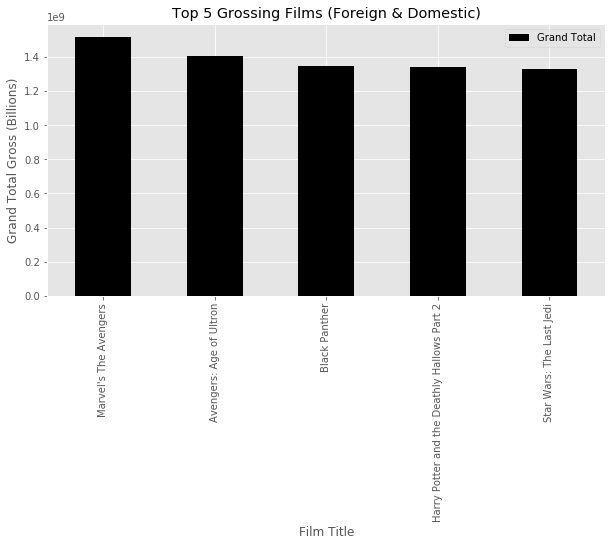

In [51]:
#Graphs Top 5 Total Grossing Films in the DataFrame object
df2_top_gt_gross.head().plot.bar(x='Title', y='Grand Total', color='black', figsize=(10,5))

#Adds labels to the graph
plt.title('Top 5 Grossing Films (Foreign & Domestic)')
plt.xlabel("Film Title")
plt.ylabel("Grand Total Gross (Billions)")

In [ ]:
#ANALYSIS On Visualization #2

In [ ]:
#Visualization 3 -  "tn.movie_budgets.csv"
#Lucrative Films are Also Expensive

#Convert CSV file to DataFrame object and orient myself with the data
df2 = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/bom.movie_gross.csv')

#Clean up DataFrame column names
df2 = df2.rename(columns={
    'title' : 'Title',
    'studio' : 'Studio',
    'domestic_gross' : 'Domestic Gross',
    'foreign_gross' : 'Foreign Gross',
    'grand_total_gross' : 'Grand_Total_Gross',
    'year' : 'Year'
})

df2.head(10)